In [1]:
import numpy as np
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.constants as sc

# Téléchargement du fichier Cif

In [2]:
with MPRester("2N9dqDh3wLHCSK1O") as m:
    struct = m.get_structure_by_material_id("mp-754541")
    bandstruct = m.get_bandstructure_by_material_id("mp-754541")
    
w = CifWriter(struct)
w.write_file('TmTlO2_mp-754541_symmetrized.cif')

# Détermination de la bande interdite

Caractéristiques de la bande interdite:
{'direct': False, 'energy': 1.3066, 'transition': 'Z-F'}

La bande interdite est donc indirecte, a une énergie de 1.3066 eV et la transition dans cette bande est de type Z-F
Celle-ci est représentée par la bande verte sur le graphe ci-dessous.


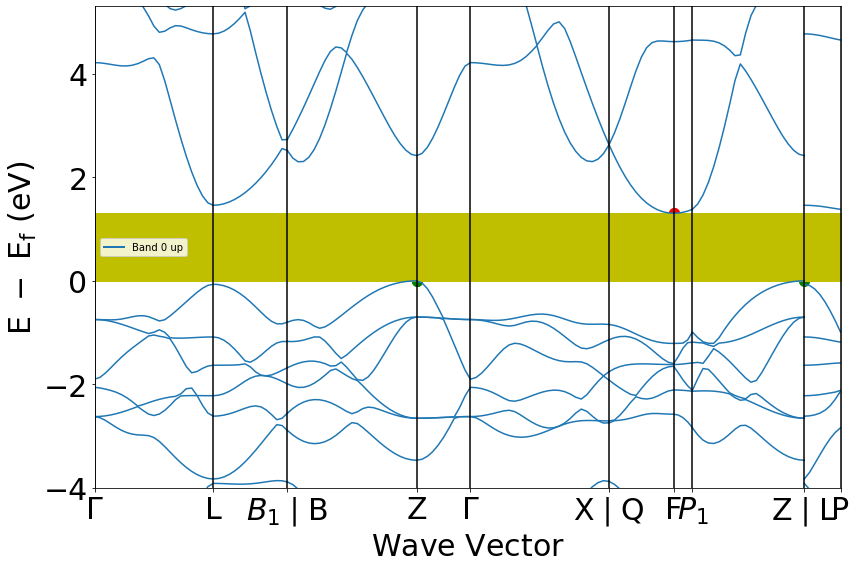

In [3]:
bandgap = bandstruct.get_band_gap()
print("Caractéristiques de la bande interdite:") 
print(bandgap)
print("")
print("La bande interdite est donc indirecte, a une énergie de 1.3066 eV et la transition dans cette bande est de type Z-F")


print("Celle-ci est représentée par la bande verte sur le graphe ci-dessous.")

bsplotter = BSPlotter(bandstruct)
data = bsplotter.bs_plot_data()

distance = data['ticks']['distance']
energie = data['energy']
bsplotter.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'y')


# Dispersion de la pemière bande de conduction et de la dernière bande de valence

In [4]:
vbm = bandstruct.get_vbm()
print(vbm.get('band_index'))
print("La dernière bande de valence est donc la bande 16")
print("")
cbm = bandstruct.get_cbm()
print(cbm.get('band_index'))
print("La première bande de conduction est donc la bande 17")

defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La dernière bande de valence est donc la bande 16

defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
La première bande de conduction est donc la bande 17


Dernière bande de valence :

Nous obtenons les valeurs suivantes pour les pentes de la dernière bande de valence (bande 16):
[ 0.64024296 -1.10300601  0.68921992 -1.55087132 -0.07714299 -0.63186422
  1.31234787  0.98566556 -2.84015028]

Nous observons alors que le minimum en valeur absolue correspond à la 4e branche (= direction qui présente le moins de dispersion) et vaut 0.07714298912141217
Le maximum en valeur absolue correspond quant-à-lui à la 3e branche (= direction qui présente le plus de dispersion) et vaut 2.8401502846974003

Première bande de conduction : 

Voici les valeurs que prennnent les pentes de la première bande de conduction (bande 17):
[-2.58931861  1.59162623 -0.08461078  3.72934793 -1.27671647 -2.28457814
  0.45271837  1.03416704 -0.24134206]

Nous observons alors que le minimum en valeur absolue correspond à la 3e branche (= direction qui présente le moins de dispersion) et vaut 0.08461077943781747
Le maximum en valeur absolue correspond quant-à-lui à la 4e branc

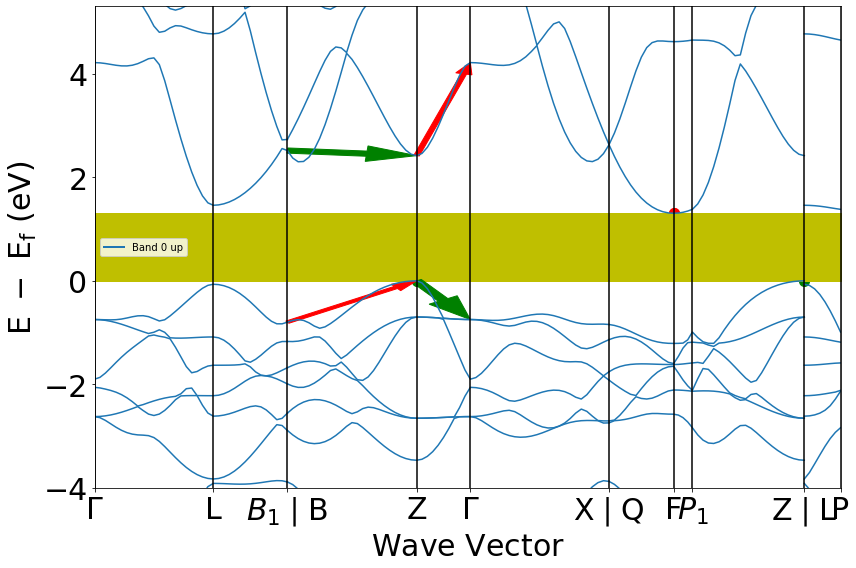

In [6]:
distanceBis = distance

for i in range(np.size(distance)-1) :
    if distanceBis[i] == distanceBis[i-1] :
        del distanceBis[i]

penteV = np.zeros(np.size(distanceBis)-1)
penteC = np.zeros(np.size(distanceBis)-1)

for i in range(np.size(distance)-1) : 
    penteV[i] = (energie["1"][i][16][-1] - energie["1"][i][16][0])/(distanceBis[i+1]-distanceBis[i])
    penteC[i] = (energie["1"][i][17][-1] - energie["1"][i][17][0])/(distanceBis[i+1]-distanceBis[i])

maxV = np.max(abs(penteV))
minV = np.min(abs(penteV))
maxC = np.max(abs(penteC))
minC = np.min(abs(penteC))

print ('\033[1m' + 'Dernière bande de valence :')
print('\033[0m')
print("Nous obtenons les valeurs suivantes pour les pentes de la dernière bande de valence (bande 16):")
print(penteV)
print("")
print("Nous observons alors que le minimum en valeur absolue correspond à la 4e branche (= direction qui présente le moins de dispersion) et vaut",minV,)
print("Le maximum en valeur absolue correspond quant-à-lui à la 3e branche (= direction qui présente le plus de dispersion) et vaut",maxV)
print("")
print ('\033[1m' + 'Première bande de conduction : ')
print('\033[0m')
print("Voici les valeurs que prennnent les pentes de la première bande de conduction (bande 17):")
print(penteC)
print("")
print("Nous observons alors que le minimum en valeur absolue correspond à la 3e branche (= direction qui présente le moins de dispersion) et vaut",minC)
print("Le maximum en valeur absolue correspond quant-à-lui à la 4e branche (= direction qui présente le plus de dispersion) et vaut",maxC)
print("")

print ('\033[1m' + 'Graphe de la structure de bande électroniques du TmTlO2: ')
print('\033[0m')
print("Les flèches rouges indiquent les dispersions maximales tandis que les flèches vertes représentent les dispersions minimales")
bsplotter.get_plot(vbm_cbm_marker=True)
plt.arrow(distance[2], energie["1"][2][17][0], distance[3]-distance[2], energie["1"][2][17][-1]-energie["1"][2][17][0], color ='green', width = 0.1, length_includes_head = True)
plt.arrow(distance[3], energie["1"][3][17][0], distance[4]-distance[3], energie["1"][3][17][-1]-energie["1"][3][17][0], color = 'r', width = 0.05, length_includes_head = True)
plt.arrow(distance[3], energie["1"][3][16][0], distance[4]-distance[3], energie["1"][3][16][-1]-energie["1"][3][16][0], color = 'green', width = 0.1, length_includes_head = True)
plt.arrow(distance[2], energie["1"][2][16][0], distance[3]-distance[2], energie["1"][2][16][-1]-energie["1"][2][16][0], color = 'r', width = 0.05, length_includes_head = True)
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'y')

# Masse effective

La masse effective (m*) peut être calculée grâce à l'expression suivante :


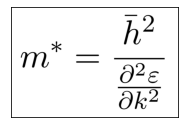

Dans cette expression, h barre représente la constante de Planck et vaut 1.0545718176461565e-34 [J*s]
Le terme au dénominateur est la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.
On suppose alors une dispersion parabolique et on va calculer l'équation de cete parabole qui est donnée par:


In [7]:
print("La masse effective (m*) peut être calculée grâce à l'expression suivante :")
image_1=img.imread('Masse_effective.png')
fig, axes = plt.subplots(figsize=(3,3))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(image_1)
plt.show()
print("Dans cette expression, h barre représente la constante de Planck et vaut 1.0545718176461565e-34 [J*s]")
print("Le terme au dénominateur est la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.")
print("On suppose alors une dispersion parabolique et on va calculer l'équation de cete parabole qui est donnée par:")


$$ y=ax^2 + bx + c$$

Dernière bande de valence :

Voici les coordonnées des 2 sommets présents sur la dernière bande de valence:
Sommet 1:  (2.8895324769058477, 0.0)
Sommet 2:  (6.3681862497029575, 0.0)

On choisit arbitrairement de travailler sur le premier sommet
 
On trouve comme équation pour la parabole:
f(x) =  -15.103155431496228 * ( x - 2.8895324769058477 )^2

On a donc f''(x) = -30.206310862992456 [eV*A²] avec A = 1e-10 [m] en Angstrom, et eV = 1.602176634e-19 [J] en électron volt
Ce qui nous donne dans les bonnes unités : f''(x) = -2.4197922732013443e-38 [J*m²]

La masse effective est donc: m* =  2.2979693978074407e-31 [kg]

Première bande de conduction : 

Voici les coordonnées de la base présente sur la première bande de conduction:
Base 1:  (5.195997463343764, 1.3066)
 
On trouve comme équation pour la parabole:
f(x) =  84.89319986693168 *( x - 5.195997463343764 )^2

On a donc f''(x) = 169.78639973386336 [eV*A²] avec A = 1e-10 [m] en Angstrom, et eV = 1.602176634e-19 [J] en électron volt
Ce qu

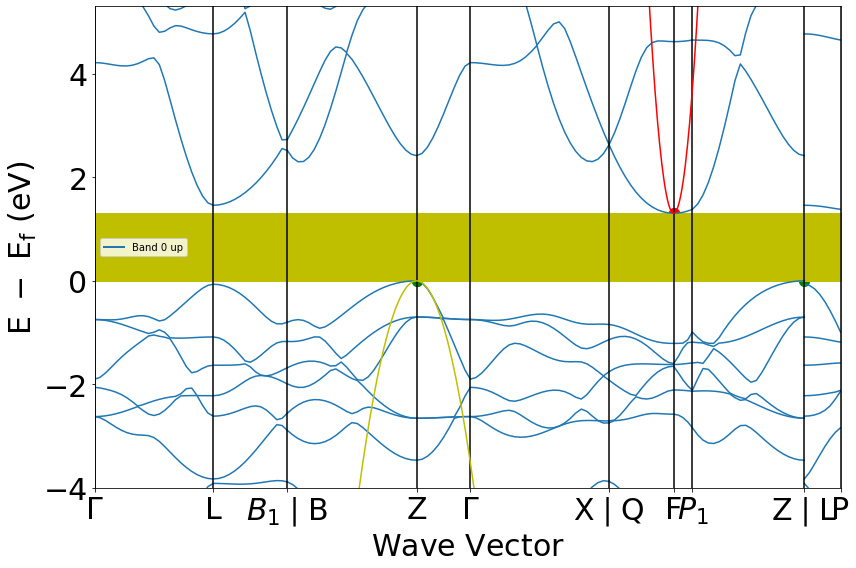

In [8]:
#-----------------Bande de valence-----------------
distances=data.get('distances')
Vbm = data.get('vbm') #Cela nous indique la présence de 2 sommets

Sommet1 = Vbm[0]
Sommet1bis = [distances[3][3],energie["1"][3][16][3]] #On choisit un autre point sur la courbe 

Sommet2 = Vbm[2]

print ('\033[1m' + 'Dernière bande de valence :')
print('\033[0m')
print("Voici les coordonnées des 2 sommets présents sur la dernière bande de valence:")
print("Sommet 1: ",Sommet1)
print("Sommet 2: ",Sommet2)
print("")
print("On choisit arbitrairement de travailler sur le premier sommet")

x1,y1=Sommet1[0],Sommet1[1]
x2,y2=Sommet1bis[0],Sommet1bis[1]

aVal = y2/((x2-x1)**2)

print(" ")
print("On trouve comme équation pour la parabole:")
print("f(x) = ", aVal, "* ( x -",x1,")^2")

zVal = np.arange(0,10,0.01)
yVal = aVal*((zVal-x1)**2) + y1

print("")
print('On a donc f\'\'(x) =', 2*aVal,'[eV*A²] avec A =',sc.angstrom,'[m] en Angstrom, et eV =',sc.e,'[J] en électron volt')
dVal = aVal*(sc.angstrom)**2*(sc.e)
print('Ce qui nous donne dans les bonnes unités : f\'\'(x) =', dVal,'[J*m²]')
masse_Val = ((sc.hbar)**2)/(2*dVal)
print("")
print('La masse effective est donc: m* = ', abs(masse_Val), '[kg]')
print("")


#----------------Bande de conduction-------------------

Cbm = data.get('cbm') #Cela nous indique la présence de 1 base

Base1 = Cbm[0]
Base1bis = [distances[6][3],energie["1"][6][17][3]] #On choisit un autre point sur la courbe 

print ('\033[1m' + 'Première bande de conduction : ')
print('\033[0m')
print("Voici les coordonnées de la base présente sur la première bande de conduction:")
print("Base 1: ",Base1)

x3,y3=Base1[0],Base1[1]
x4,y4=Base1bis[0],Base1bis[1]

aCond = y4/((x4-x3)**2)

print(" ")
print("On trouve comme équation pour la parabole:")
print("f(x) = ", aCond, "*( x -",x3,")^2")

zCond = np.arange(0,10,0.01)
yCond = aCond*((zCond-x3)**2)+y3

print("")
print('On a donc f\'\'(x) =', 2*aCond,'[eV*A²] avec A =',sc.angstrom,'[m] en Angstrom, et eV =',sc.e,'[J] en électron volt')
dCond = aCond*(sc.angstrom)**2*(sc.e)
print('Ce qui nous donne dans les bonnes unités : f\'\'(x) =', dCond,'[J*m²]')
masse_Cond = ((sc.hbar)**2)/(2*dCond)
print("")
print('La masse effective est donc: m* = ', abs(masse_Cond), '[kg]')
print("")


# -------------Figure-----------
print ('\033[1m' + 'Représentation de l\'approximation parabolique de la dispersion')
print('\033[0m')
bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(zVal,yVal,'y')
plt.plot(zCond,yCond,'r')
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap['energy'], color = 'y')
